In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import*
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('/data/CC GENERAL.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [4]:
#313 values missing from the MINIMUM_PAYMENTS column and only 1 missing from CREDIT_LIMIT column.
missing = df.isna().sum()
print(missing)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [5]:
#Since the number of missing values is low (the total number of samples is 8950), we'll impute with median of the columns.
df = df.fillna( df.median() )
#droping the customer ID.(not usefull)
df.drop("CUST_ID", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT           

In [6]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


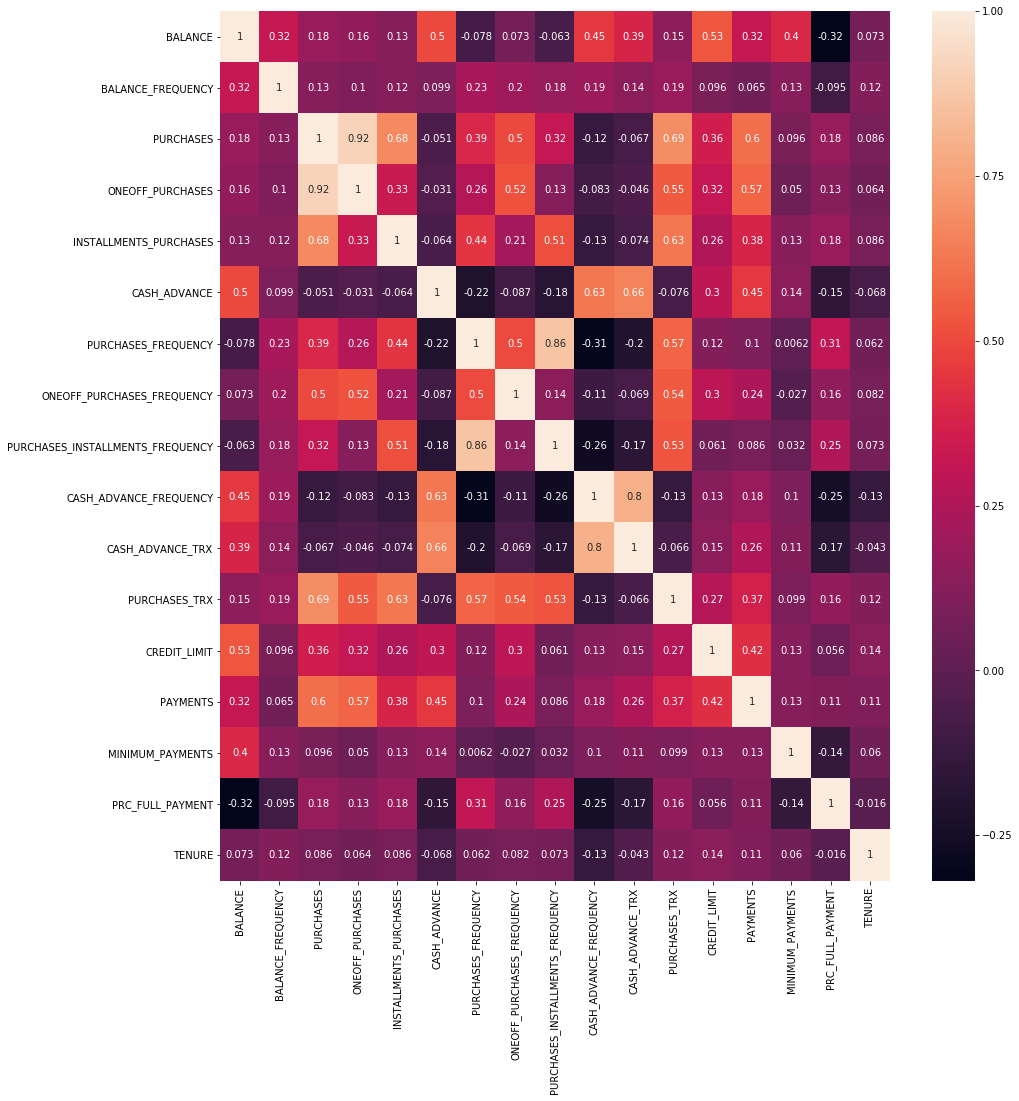

In [7]:
# Compute pairwise correlation of columns, excluding NA/null values, The lighter it is the more correlation between the 2 columns.
pyplot.figure(figsize=(15, 16))
sns.heatmap(df.corr(), annot=True)

# We can notice that[ONEOFF_PURCHASES,PURCHASES	] are the most corelated columns in our df.

In [8]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
# Feature Scaling.

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

cols =  ['BALANCE',
         'PURCHASES',
         'ONEOFF_PURCHASES',
         'INSTALLMENTS_PURCHASES',
         'CASH_ADVANCE',
         'CASH_ADVANCE_TRX',
         'PURCHASES_TRX',
         'CREDIT_LIMIT',
         'PAYMENTS',
         'MINIMUM_PAYMENTS',
        ]

for col in cols:
    df[col] = mms.fit_transform(df[[col]])








# from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()
# cols =  ['BALANCE',
#          'PURCHASES',
#          'ONEOFF_PURCHASES',
#          'INSTALLMENTS_PURCHASES',
#          'CASH_ADVANCE',
#          'CASH_ADVANCE_TRX',
#          'PURCHASES_TRX',
#          'CREDIT_LIMIT',
#          'PAYMENTS',
#          'MINIMUM_PAYMENTS',
#         ]

# for col in cols:
#     df[col] =ss.fit_transform(df[[col]])

    
    
df.head()

D:\Anaconda3\envs\ztdl\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\envs\ztdl\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,12
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.250000,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,12
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,12
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.083333,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000,12
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,12


In [10]:
# Checking if any features are correlated.

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

for col in df.columns:
    X = df.drop([col], axis=1)
    y = df[col]
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
    reg = DecisionTreeRegressor()
    reg.fit(X_train,y_train)
    print('Score for {} as dependent variable is: {}'.format(col,reg.score(X_test,y_test)))
    

# We can notice that PURCHASES_FREQUENCY, INSTALLMENTS_PURCHASES, PURCHASES and PURCHASES_INSTALLMENTS_FREQUENCY are the most dependent features.

Score for BALANCE as dependent variable is: 0.9002571009477284
Score for BALANCE_FREQUENCY as dependent variable is: 0.6178190437373149
Score for PURCHASES as dependent variable is: 0.9484894050526753
Score for ONEOFF_PURCHASES as dependent variable is: 0.8765760953790105
Score for INSTALLMENTS_PURCHASES as dependent variable is: 0.9007270350249726
Score for CASH_ADVANCE as dependent variable is: 0.44229518778836613
Score for PURCHASES_FREQUENCY as dependent variable is: 0.9838520467626259
Score for ONEOFF_PURCHASES_FREQUENCY as dependent variable is: 0.8114405051779932
Score for PURCHASES_INSTALLMENTS_FREQUENCY as dependent variable is: 0.9491338773366171
Score for CASH_ADVANCE_FREQUENCY as dependent variable is: 0.7273081219822841
Score for CASH_ADVANCE_TRX as dependent variable is: 0.1780252545420149
Score for PURCHASES_TRX as dependent variable is: 0.2945917784666935
Score for CREDIT_LIMIT as dependent variable is: 0.002526821839184623
Score for PAYMENTS as dependent variable is: 0

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17)
pca.fit(df)

#Equal to n_components largest eigenvalues of the covariance square matrix.
#pca.explained_variance_

variance_list=pca.explained_variance_ratio_
variance_list

array([7.39960486e-01, 1.35237972e-01, 3.82787213e-02, 3.58366646e-02,
       2.10407665e-02, 1.34345068e-02, 6.68511517e-03, 3.70124481e-03,
       1.81656504e-03, 1.50697030e-03, 8.00679190e-04, 5.23818705e-04,
       3.55163005e-04, 3.35011030e-04, 2.89436135e-04, 1.96870852e-04,
       8.54290481e-09])

In [12]:
sum=0;
y=0;
for i in range(len(variance_list)-12):
    sum+=variance_list[i]
    y+=1

print(sum)
print(y)

0.970354610417905
5


In [13]:
# Sum of explained variances of the first five components is 97%
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]+pca.explained_variance_ratio_[3]+pca.explained_variance_ratio_[4]

0.970354610417905

In [14]:
#printing the compontents of the dimension with the explained variance

dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

components = pd.DataFrame(pca.components_,columns=list(df))
components.index = dimensions

variance = pd.DataFrame(pca.explained_variance_ratio_, columns=['Explained Variance'])
variance.index = dimensions


pd.concat([variance,components], axis=1)


,Explained Variance,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Dimension 1,7.399605e-01,-0.005958,-0.022488,-0.003107,-0.002153,-0.002872,0.002404,-0.023892,-0.020789,-0.026552,0.020876,0.001987,-0.006963,-0.012977,-0.004646,-0.001384,0.002543,-9.985168e-01
Dimension 2,1.352380e-01,-0.019315,0.092079,0.032096,0.019442,0.034744,-0.017500,0.683996,0.237184,0.634670,-0.114278,-0.021722,0.073218,0.025044,0.012032,-0.000252,0.199449,-4.323963e-02
Dimension 3,3.827872e-02,0.114343,0.293846,0.046689,0.057166,-0.001834,0.021650,0.101486,0.812487,-0.393695,0.144948,0.031553,0.064049,0.128749,0.043302,0.004615,-0.156185,-1.601924e-02
Dimension 4,3.583666e-02,-0.164050,-0.365294,0.013251,0.019364,-0.006201,-0.036483,-0.058164,0.229546,-0.274731,-0.255521,-0.054764,-0.004889,0.000665,0.007293,-0.021440,0.798284,9.574091e-03
Dimension 5,2.104077e-02,-0.127270,-0.656234,0.002379,0.007876,-0.009080,-0.066320,0.115682,0.218398,-0.026244,-0.427287,-0.098423,0.011721,-0.069705,-0.040736,-0.010684,-0.536480,-7.034214e-04
Dimension 6,1.343451e-02,0.208056,-0.573813,0.033443,0.024267,0.028925,0.124088,0.007945,0.071083,0.149854,0.679081,0.173893,0.055540,0.267312,0.116353,0.012836,0.045142,1.632435e-02
Dimension 7,6.685115e-03,0.425147,0.048299,0.117635,0.088914,0.095325,0.032515,-0.224687,-0.050671,0.126962,-0.418632,-0.089169,0.117967,0.702167,0.150879,0.049009,0.009692,-2.094610e-02
Dimension 8,3.701245e-03,-0.172230,0.035917,0.137709,0.102916,0.113714,-0.044869,-0.630076,0.336046,0.501017,0.010053,-0.009373,0.278743,-0.276548,0.093469,-0.020408,0.008146,-4.653559e-03
Dimension 9,1.816565e-03,0.680967,-0.072775,0.161329,0.139556,0.098812,0.062386,0.109830,-0.069418,-0.119824,-0.102742,0.005449,0.201924,-0.565716,0.198676,0.160634,0.062597,1.461821e-03
Dimension 10,1.506970e-03,-0.436490,0.044479,0.374892,0.330084,0.219258,0.072191,0.189457,-0.204230,-0.202506,0.026495,0.067864,0.266728,0.072027,0.546159,-0.040840,-0.067108,-3.910918e-04


In [15]:
#Since the variance explained by the first 5 components is approximately 97% we could only use these 5 dimensions.
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(df)
pca.explained_variance_ratio_

array([0.73996049, 0.13523797, 0.03827872, 0.03583666, 0.02104077])

In [16]:
transformed_data = pca.transform(df)
transformed_data = pd.DataFrame(transformed_data,columns=['Dimension 1','Dimension 2',"Dimension 3","Dimension 4","Dimension 5"])
transformed_data.head()

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5
0,-0.462025,-0.494116,-0.138096,0.002575,0.127537
1,-0.455603,-0.637866,-0.042253,0.081927,-0.225908
2,-0.508498,0.282671,0.891790,0.119493,0.293820
3,-0.457145,-0.605738,-0.046225,0.081157,0.195410
4,-0.463982,-0.568403,0.013101,-0.023595,0.012918


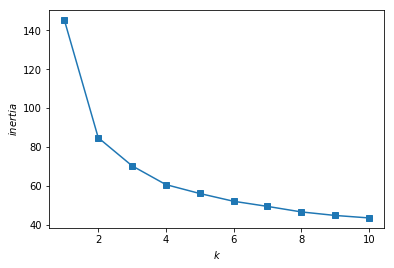

In [17]:
# Use elbow method to find the ideal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(transformed_data)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 11), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$inertia$');

In [18]:
model = KMeans(n_clusters=2)
model.fit(transformed_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
# Prediction on the entire data
all_predictions = model.predict(transformed_data)
print(all_predictions)

[0 0 0 ... 1 1 1]


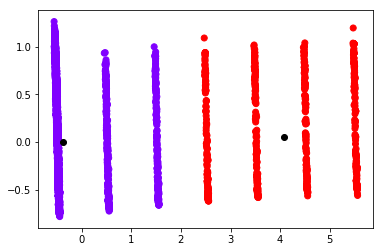

In [20]:
plt.scatter(transformed_data.iloc[:,0],transformed_data.iloc[:,1],c=model.labels_,cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black')
plt.show()

In [21]:
#using TruncatedSVD alg for dimentionality reduction
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=5, random_state=42).fit_transform(df)

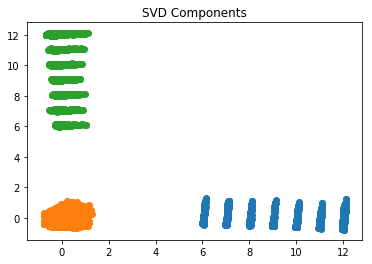

In [22]:
#plotting data after using SVD
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,2])
plt.scatter(svd[:,2],svd[:,0])

In [23]:
#using AgglomerativeClustering for clustering data by 3 clusters as well
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(svd)  

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

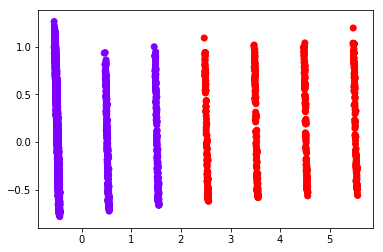

In [24]:
#plotting clustered data
plt.scatter(transformed_data.iloc[:,0],transformed_data.iloc[:,1], c=cluster.labels_, cmap='rainbow') 
plt.show()

# So for Choosing the model with the best results
it seems like both of kmeans and AgglomerativeClustering algorithms are clustering data by sameway but
kmeans seems somehow better, in addition we have centroid for each cluster which give more info about data